<a href="https://colab.research.google.com/github/saifudnm/jagoan_hosting/blob/master/mtcars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pylab as py
import scipy.stats as stats
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

In [0]:
# import data
url = 'https://raw.githubusercontent.com/saifudnm/jagoan_hosting/master/mtcars.csv'
data = pd.read_csv(url)

In [11]:
data.head()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


**ADD COLUMN CALLED mpg_level**

Isi dari kolom mpg_level tersebut berdasarkan variabel mpg dengan ketentuan sebagai berikut :

*   Jika mpg < 20 maka mpg_level = low
*   Jika mpg berkisar 20-30 maka mpg_level = medium
*   Jika mpg > 30 maka mpg_level = hard

In [12]:
# create funct mpg_level
def mpg_level():
    value_list = []
    for i in range(len(data)):
        if data.loc[i, 'mpg'] < 20:
            value_list.append('low')
        elif data.loc[i, 'mpg'] in range(20,31):
            value_list.append('medium')
        else:
            value_list.append('hard')
    return value_list

# create mpg_level column & fill with mpg_level func
data['mpg_level'] = pd.Series(mpg_level(), index=data.index)

data.head()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_level
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,medium
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,medium
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,hard
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,hard
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,low


**HEATMAP**

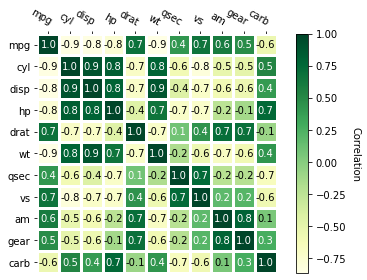

In [19]:
# heatmaps
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

data_col = list(data.iloc[:,1:-1].columns)
correlation = data.iloc[:,1:-1].corr(method='pearson').values

fig, ax = plt.subplots()
im, cbar = heatmap(correlation, data_col, data_col, ax=ax,
                   cmap="YlGn", cbarlabel="Correlation")
texts = annotate_heatmap(im, valfmt="{x:.1f}")
fig.tight_layout()
plt.show()


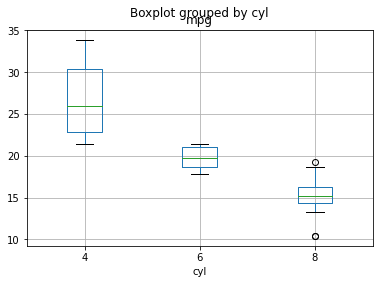

In [25]:
# boxplot
data.boxplot(column='mpg', by='cyl')

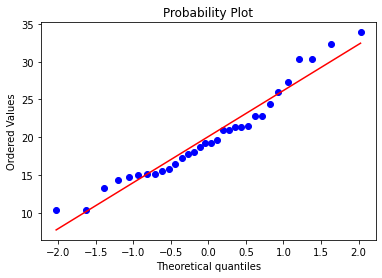

In [27]:
# Q-Q plot
stats.probplot(data['mpg'], dist='norm', plot=py)
py.show()

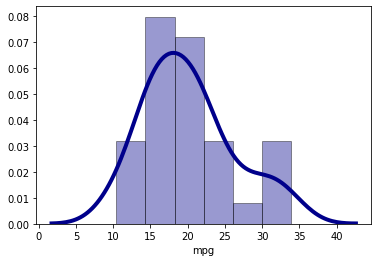

In [28]:
# Histogram & Density Plot
sns.distplot(data['mpg'], hist=True, kde=True,
             color='darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

3 grafik di atas yaitu boxplot, Q-Q plot, histogram & density plot menunjukkan bahwa variabel mpg mempunyai distribusi yang normal

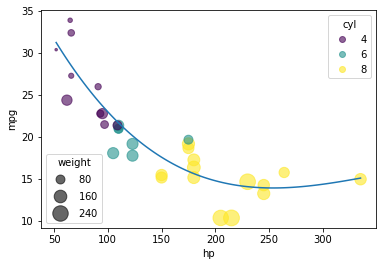

In [29]:
mymodel = np.poly1d(np.polyfit(data['hp'], data['mpg'], 3))
myline = np.linspace(min(data['hp']),max(data['hp']), 100)

scaler = MinMaxScaler(feature_range=(0,250))
wt_scaler = scaler.fit_transform(np.array(data['wt']).reshape(-1,1))

scatter = plt.scatter(data['hp'], data['mpg'], c=data['cyl'], 
                      s=wt_scaler, alpha=0.6)
plt.plot(myline, mymodel(myline))
legend1 = plt.legend(handles=scatter.legend_elements()[0], 
                     labels=[str(i) for i in np.unique(data['cyl'])],
                     title='cyl',
                     fancybox=True,
                     loc=1)
handles, labels = scatter.legend_elements(prop='sizes', num=4, alpha=0.6)
plt.legend(handles, labels, loc=3, title='weight')
plt.gca().add_artist(legend1)
plt.xlabel('hp')
plt.ylabel('mpg')
plt.show()

In [30]:
print(r2_score(data['mpg'], mymodel(data['hp'])))

0.7605734658145943
